In [1]:
##import libaraires 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
#to make sure that the visualize display without calling it 
%matplotlib inline

In [4]:
# Import data
df = pd.read_excel(r'/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 6/Raw data/Furniture Superstore copy.xlsx')
print(df)

                      Order ID Order Date            Ship Date  \
0      AE-2018-EB4110138-41926 2018-10-14  2018-10-14 00:00:00   
1      IN-2017-TS2134092-41219 2017-11-06  2017-11-08 00:00:00   
2      IN-2017-MB1808592-41378 2017-04-14  2017-04-18 00:00:00   
3        AG-2018-CL25653-42164 2018-06-09  2018-06-13 00:00:00   
4     CA-2017-AB10015140-40974 2017-03-06  2017-03-07 00:00:00   
...                        ...        ...                  ...   
7461  ES-2017-BC11125120-41010 2017-04-11  2017-04-15 00:00:00   
7462  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7463  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7464  CA-2017-JA15970140-41224 2017-11-11  2017-11-15 00:00:00   
7465  ZA-2018-TS11205146-42062 2018-02-27  2018-03-03 00:00:00   

           Ship Mode   Customer ID   Customer Name      Segment  \
0           Same Day    EB-4110138  Eugene Barchas     Consumer   
1        First Class    TS-2134092   Toby Swindell     Consumer   
2     

In [5]:
df.head()
# Check the first 5 rows of the data frame

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,IsFirstShopping,Rating,Customer Referrals,Complaint
0,AE-2018-EB4110138-41926,2018-10-14,2018-10-14 00:00:00,Same Day,EB-4110138,Eugene Barchas,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,...,224.748,6,0.7,-232.2720,60.08,High,0,4,18,0
1,IN-2017-TS2134092-41219,2017-11-06,2017-11-08 00:00:00,First Class,TS-2134092,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,1822.080,4,0.0,564.8400,894.77,Critical,0,5,0,0
2,IN-2017-MB1808592-41378,2017-04-14,2017-04-18 00:00:00,Standard Class,MB-1808592,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,...,5244.840,6,0.0,996.4800,878.38,High,0,4,0,0
3,AG-2018-CL25653-42164,2018-06-09,2018-06-13 00:00:00,Standard Class,CL-25653,Clay Ludtke,Consumer,Saida,Saida,Algeria,...,516.000,4,0.0,61.9200,46.75,High,0,4,0,0
4,CA-2017-AB10015140-40974,2017-03-06,2017-03-07 00:00:00,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,...,48.712,1,0.2,5.4801,11.13,High,1,4,4,0


In [6]:
df.dtypes
# Check the type of columns

Order ID                      object
Order Date            datetime64[ns]
Ship Date                     object
Ship Mode                     object
Customer ID                   object
Customer Name                 object
Segment                       object
City                          object
State                         object
Country                       object
Region                        object
Market                        object
Product ID                    object
Sub-Category                  object
Product Name                  object
Sales                        float64
Quantity                       int64
Discount                     float64
Profit                       float64
Shipping Cost                float64
Order Priority                object
IsFirstShopping                int64
Rating                         int64
Customer Referrals             int64
Complaint                      int64
dtype: object

In [7]:
##reducing the memory
df['IsFirstShopping']=df['IsFirstShopping'].astype('int8')
df['Rating']=df['Rating'].astype('int8')
df['Customer Referrals']=df['Customer Referrals'].astype('int8')
df['Complaint']=df['Complaint'].astype('int8')



In [8]:
df.dtypes

Order ID                      object
Order Date            datetime64[ns]
Ship Date                     object
Ship Mode                     object
Customer ID                   object
Customer Name                 object
Segment                       object
City                          object
State                         object
Country                       object
Region                        object
Market                        object
Product ID                    object
Sub-Category                  object
Product Name                  object
Sales                        float64
Quantity                       int64
Discount                     float64
Profit                       float64
Shipping Cost                float64
Order Priority                object
IsFirstShopping                 int8
Rating                          int8
Customer Referrals              int8
Complaint                       int8
dtype: object

In [9]:
# Check for missing values

df.isnull().sum()

#no missing values

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
IsFirstShopping       0
Rating                0
Customer Referrals    0
Complaint             0
dtype: int64

In [10]:
# Find duplicates (no duplicate)

df_dups = df[df.duplicated()]
df_dups.shape
#no duplicate

(0, 25)

In [11]:
# mixed data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

Ship Date


In [12]:
## find the correlation
# Create a correlation matrix using pandas

df.corr()

,Sales,Quantity,Discount,Profit,Shipping Cost,IsFirstShopping,Rating,Customer Referrals,Complaint
Sales,1.000000,0.422336,-0.103566,0.356163,0.764429,-0.298672,-0.031016,-0.109141,-0.015498
Quantity,0.422336,1.000000,0.047032,0.070693,0.300044,-0.684659,-0.029714,0.041771,-0.017518
Discount,-0.103566,0.047032,1.000000,-0.535771,-0.088692,-0.044960,-0.000827,0.991642,0.001303
Profit,0.356163,0.070693,-0.535771,1.000000,0.275281,-0.050063,-0.014486,-0.533621,0.007338
Shipping Cost,0.764429,0.300044,-0.088692,0.275281,1.000000,-0.226067,0.223429,-0.093039,0.004037
IsFirstShopping,-0.298672,-0.684659,-0.044960,-0.050063,-0.226067,1.000000,0.026637,-0.037435,0.023716
Rating,-0.031016,-0.029714,-0.000827,-0.014486,0.223429,0.026637,1.000000,0.001441,-0.470201
Customer Referrals,-0.109141,0.041771,0.991642,-0.533621,-0.093039,-0.037435,0.001441,1.000000,0.001815
Complaint,-0.015498,-0.017518,0.001303,0.007338,0.004037,0.023716,-0.470201,0.001815,1.000000


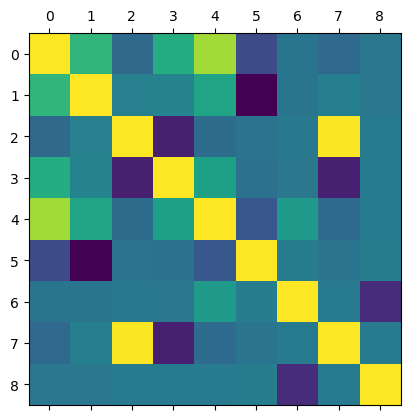

In [13]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [14]:
#current dir
cwd = os.getcwd()
cwd

'/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 6/Scripts'

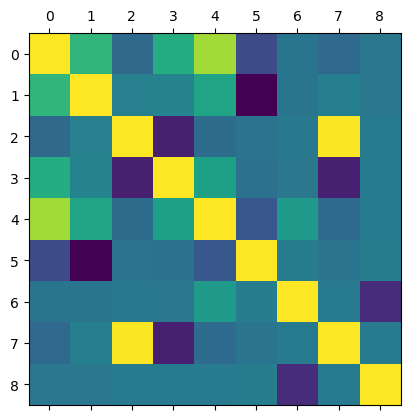

In [15]:
# Save figure
plt.matshow(df.corr())
plt.savefig("correlation_matshow.png")

In [16]:
## create another data with columns include numbers to use it for correlations
sub_1 = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'IsFirstShopping', 'Rating', 'Customer Referrals', 'Complaint']]

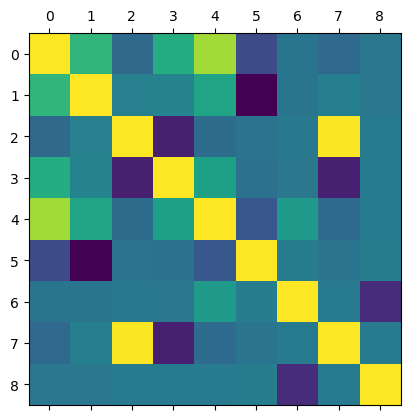

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_1.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Matshow')

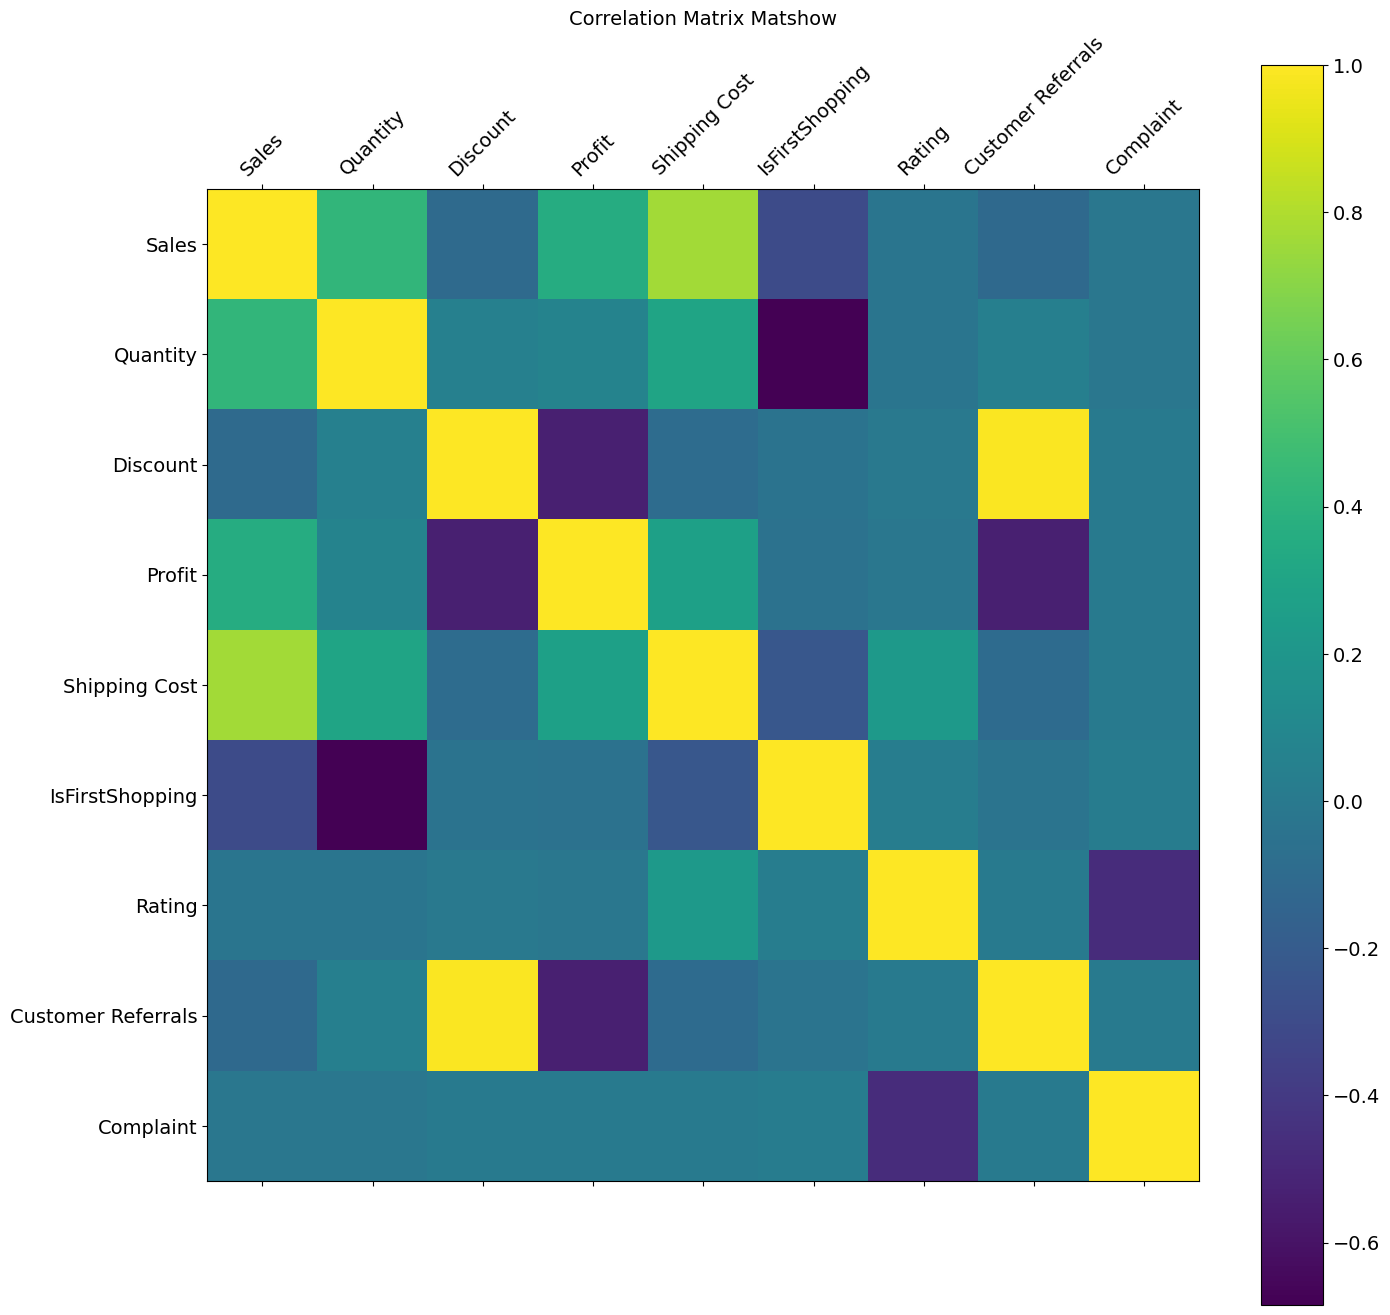

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(16, 16))  
plt.matshow(sub_1.corr(), fignum=f.number)
plt.xticks(range(sub_1.shape[1]), sub_1.columns, fontsize=14, rotation=45)
plt.yticks(range(sub_1.shape[1]), sub_1.columns, fontsize=14) 
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix Matshow', fontsize=14)

In [19]:
# Create a correlation heatmap using seaborn
sub_1.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'IsFirstShopping', 'Rating', 'Customer Referrals', 'Complaint'],
      dtype='object')

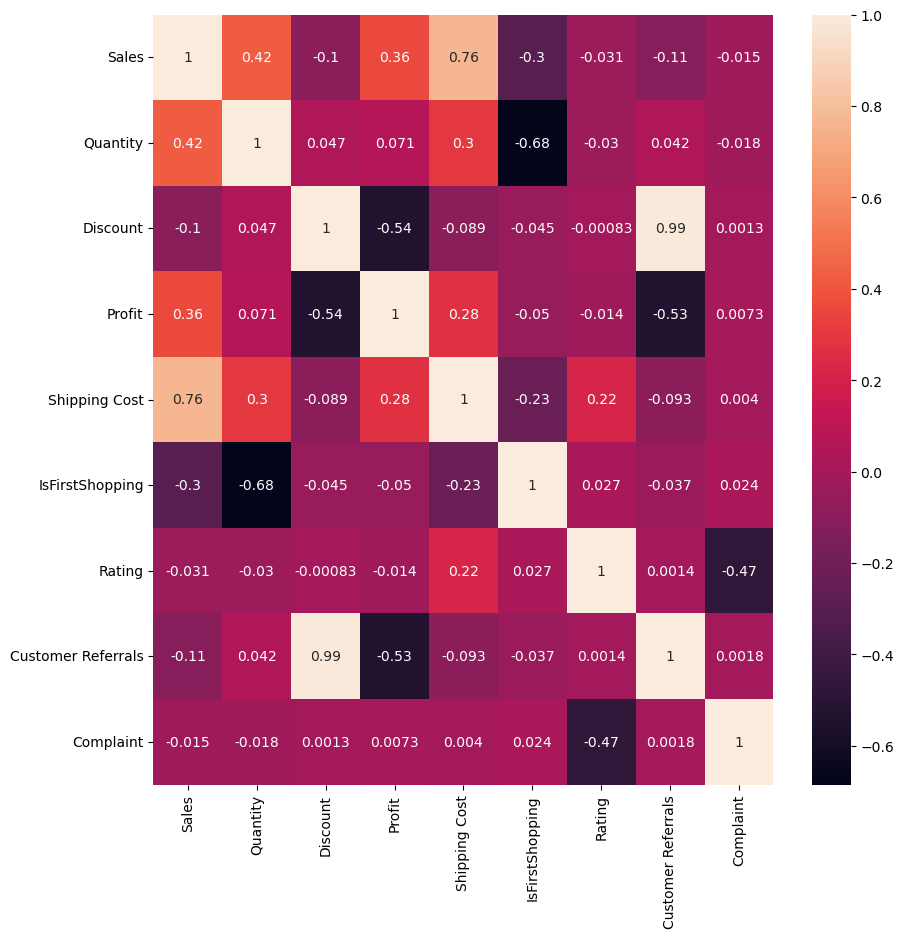

In [21]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(sub_1.corr(), annot = True, ax = ax)

## we can see a strong corre;ation between sales and profit, also very strong relation between discounts and customer referrals

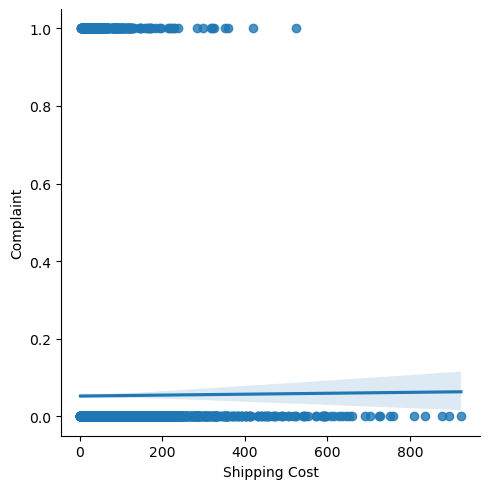

In [22]:
##scatterplot
# Create a scatterplot for the "shipping cost" and "complaints" columns in seaborn

sns.lmplot(x = 'Shipping Cost', y = 'Complaint', data = df)
## it is interstenting that there is no correlation between shipping cost and complaint as usually shipping costs are really high

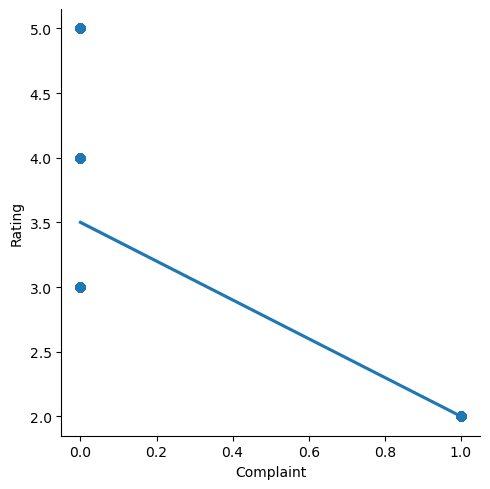

In [27]:
# Create a scatterplot for the " ratings" and "complaints" columns in seaborn

sns.lmplot(x = 'Complaint', y = 'Rating', data = df)
#it shows the higher negative relation which means the higher the rating the lower the complaint

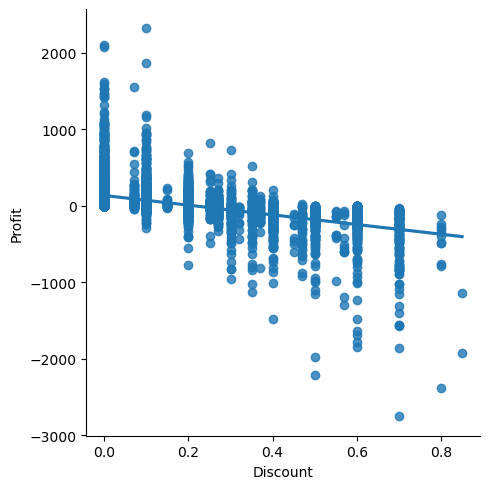

In [28]:
# Create a scatterplot for the "discount" and "profit" columns in seaborn

sns.lmplot(x = 'Discount', y = 'Profit', data = df)
#it shows the low negative relationship, which means the higher the profit is the low the discount is

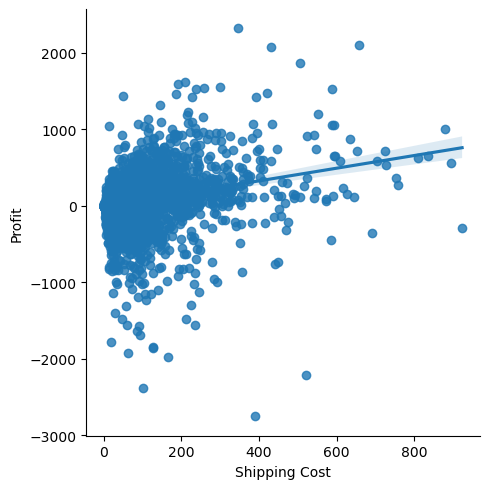

In [29]:
# Create a scatterplot for the "shipping cost" and "profit" columns in seaborn

sns.lmplot(x = 'Shipping Cost', y = 'Profit', data = df)
#it shows the low positive relationship, which means the higher the profit is the higher the shipping cost

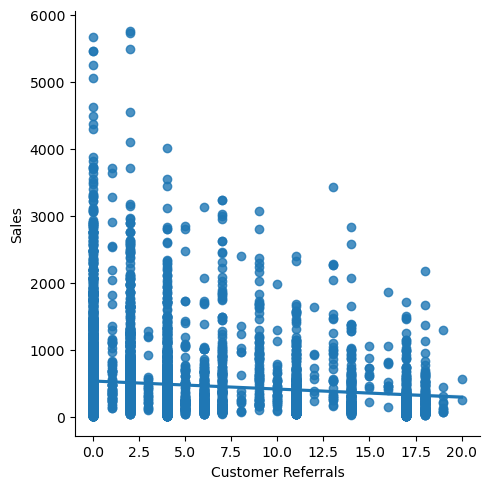

In [30]:
# Create a scatterplot for the "customer referral" and "sales" columns in seaborn

sns.lmplot(x = 'Customer Referrals', y = 'Sales', data = df)
#it shows the low negative relationship, which means the customer referrals doesn't have high impact on sales

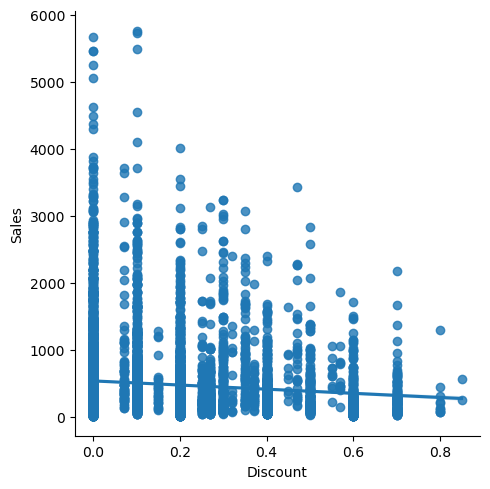

In [31]:
# Create a scatterplot for the  "discount" and "Sales" columns in seaborn

sns.lmplot(x = 'Discount', y = 'Sales', data = df)
#it shows the low negative relationship, which means the discount doesn't have high impact on sales

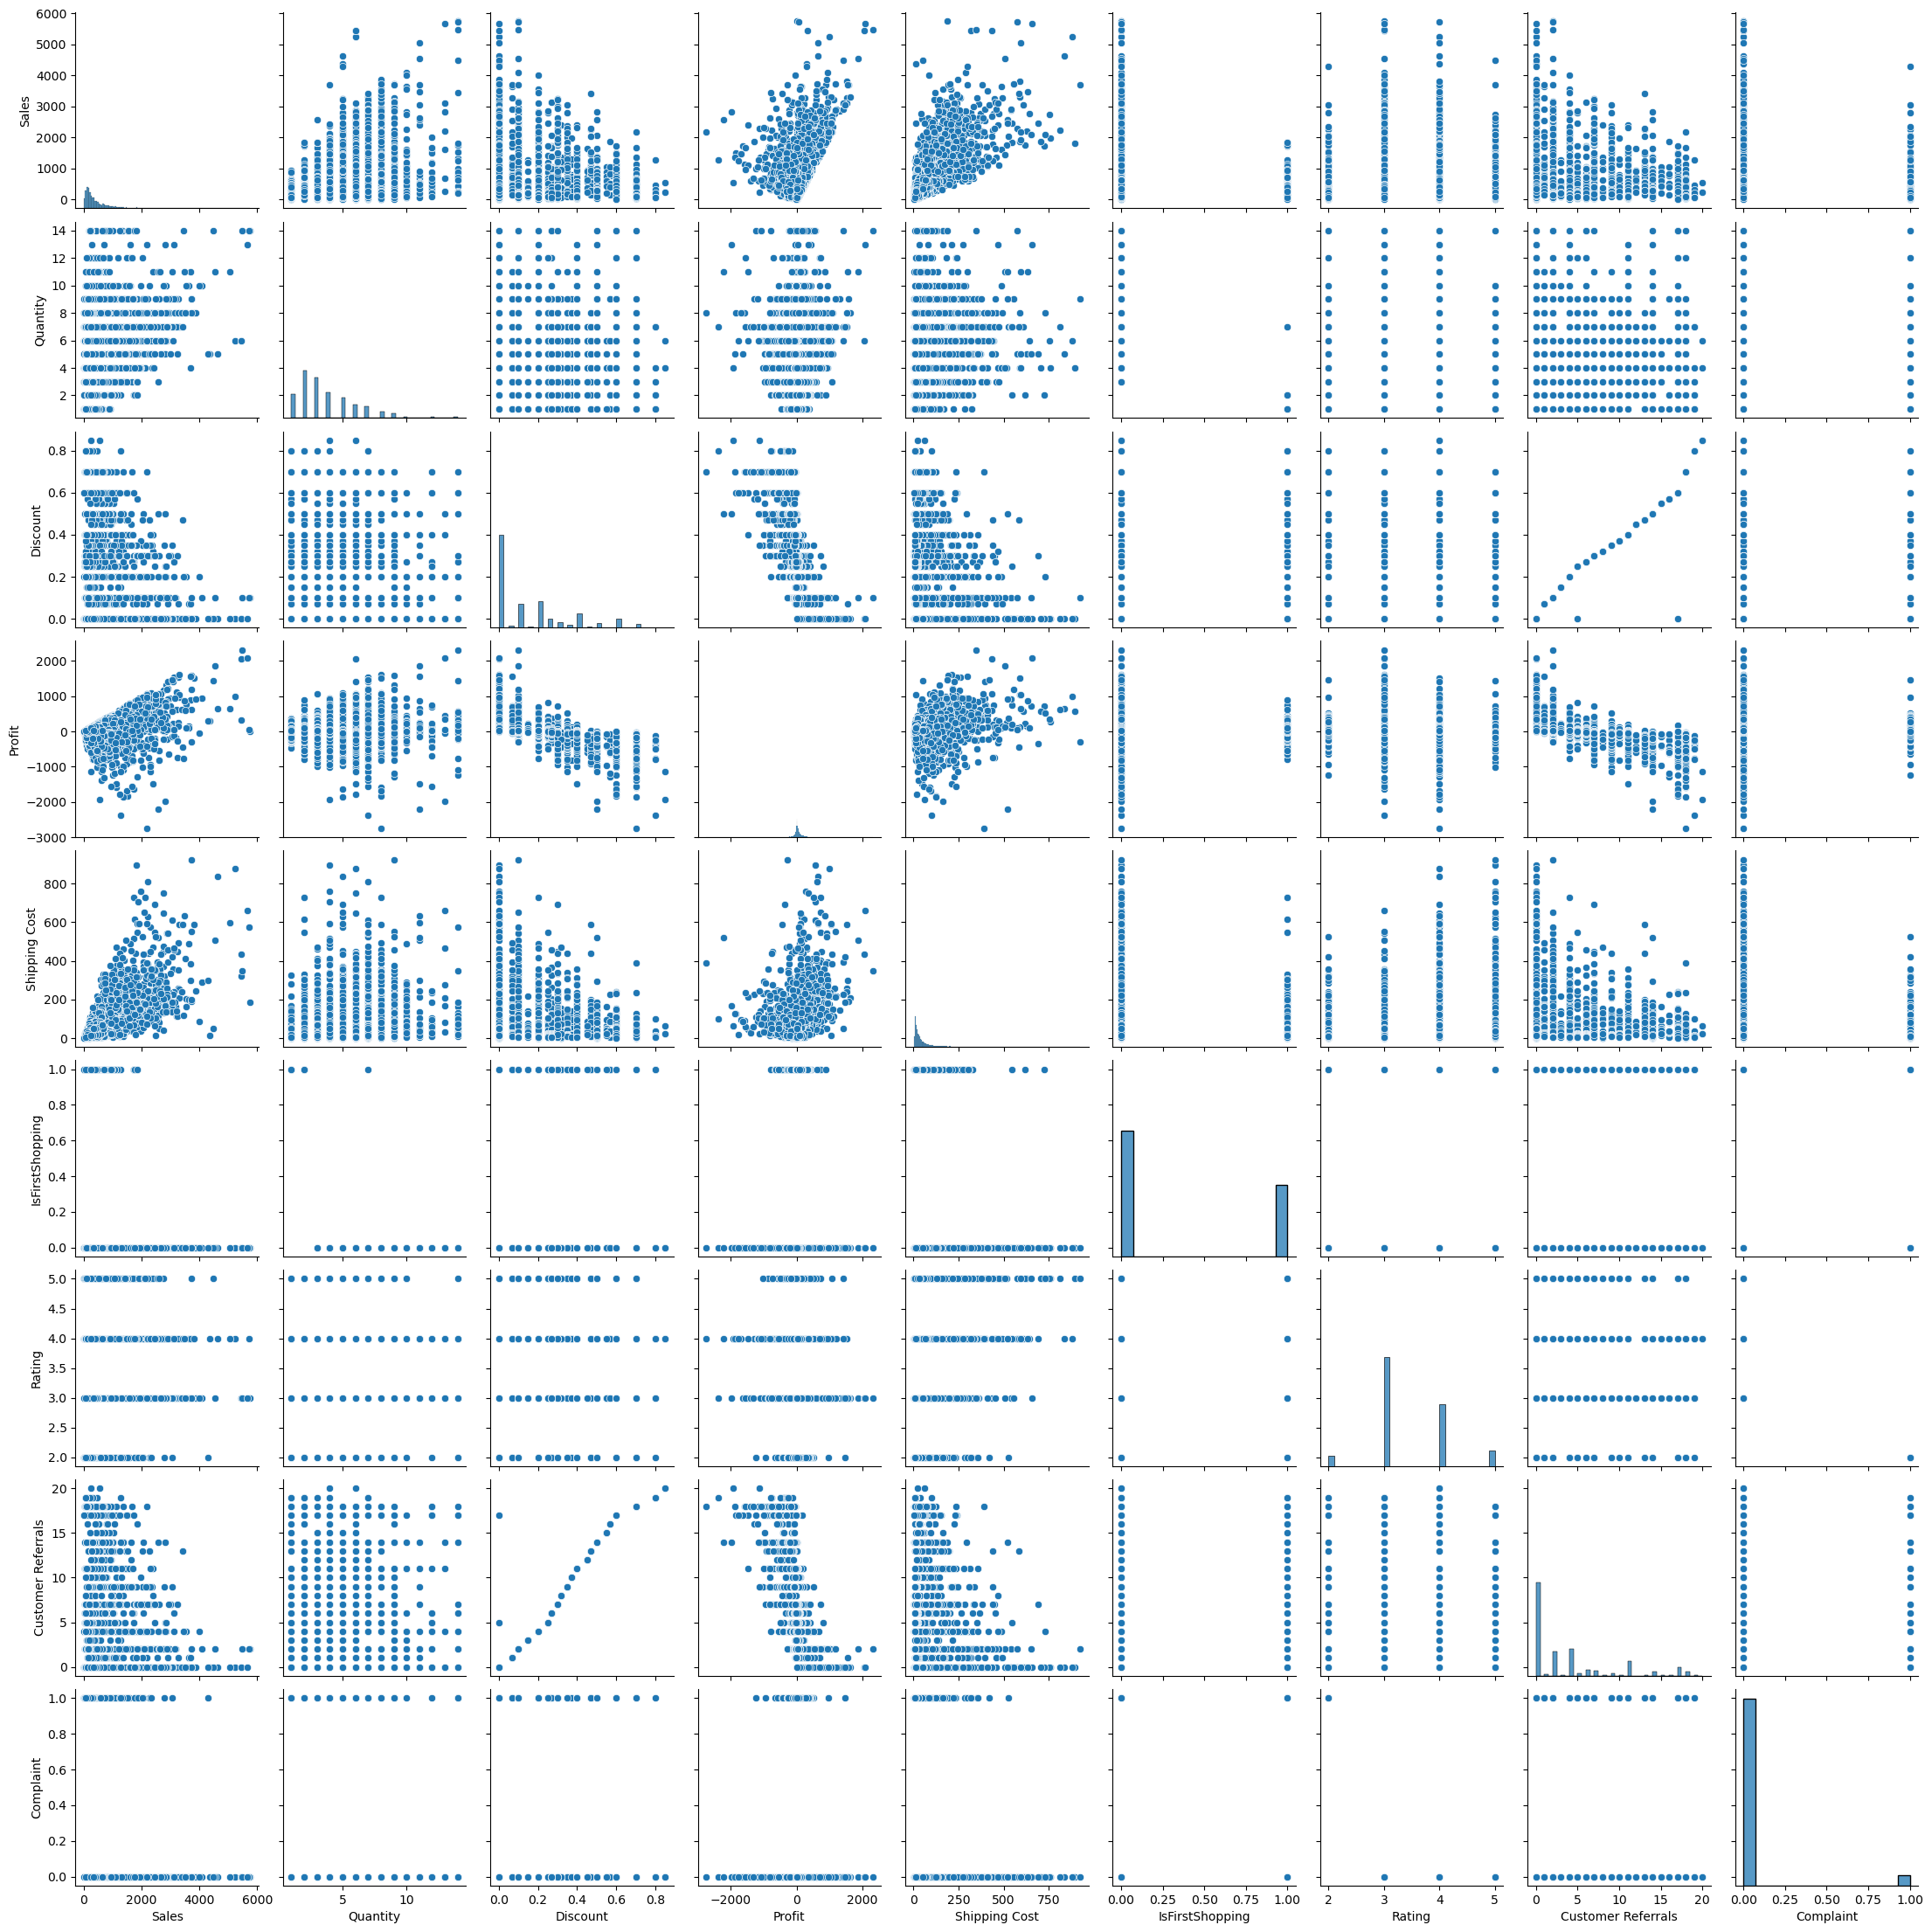

In [32]:
# Create a pair plot 

A = sns.pairplot(sub_1)

<AxesSubplot:xlabel='Customer Referrals', ylabel='Count'>

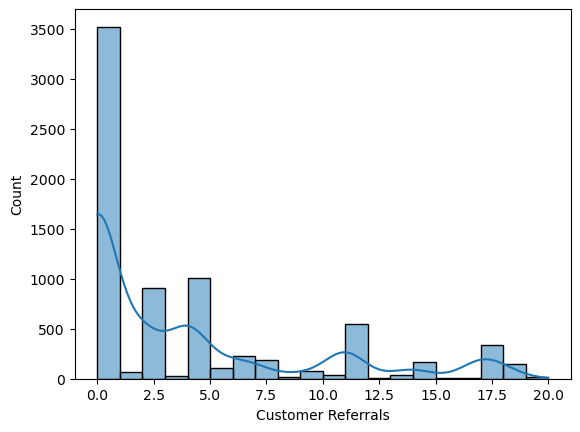

In [34]:
##Creating a categorical variable that splits the "customer referrals" column into categories
sns.histplot(df['Customer Referrals'], bins = 20, kde = True)
# the highest is the 0, means we need to focus on encourging customers to reffer their friends b maybe extra discounts or coupuons

<AxesSubplot:xlabel='Discount', ylabel='Count'>

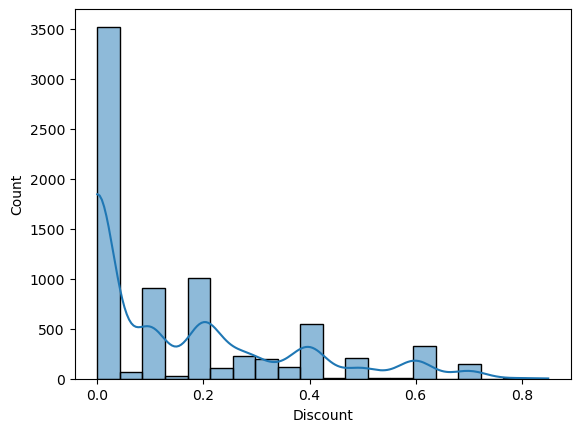

In [35]:
##Creating a categorical variable that splits the "discount" column into categories
sns.histplot(df['Discount'], bins = 20, kde = True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

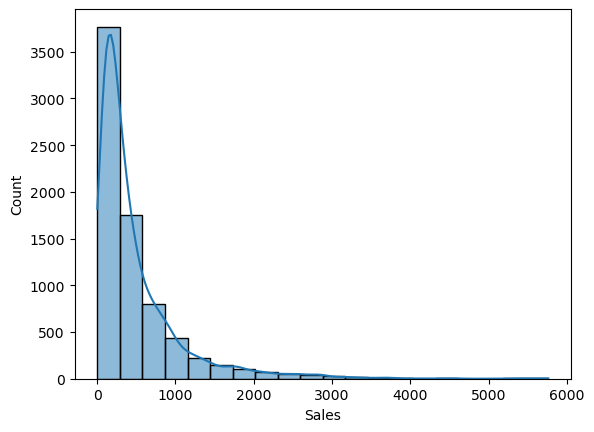

In [36]:
##Creating a categorical variable that splits the "customer referrals" column into categories
sns.histplot(df['Sales'], bins = 20, kde = True)

In [37]:
df.loc[df['Customer Referrals'] < 7.5, 'Referral_category'] = 'Low Referral'
df.loc[(df['Customer Referrals'] >= 7.5) & (df['Customer Referrals'] < 15), 'Referral_category'] = 'Middle Referral'
df.loc[df['Customer Referrals'] >= 15, 'Referral_category'] = 'High Referral'

In [38]:
df['Referral_category'].value_counts(dropna = False)

Low Referral       6055
Middle Referral     896
High Referral       515
Name: Referral_category, dtype: int64

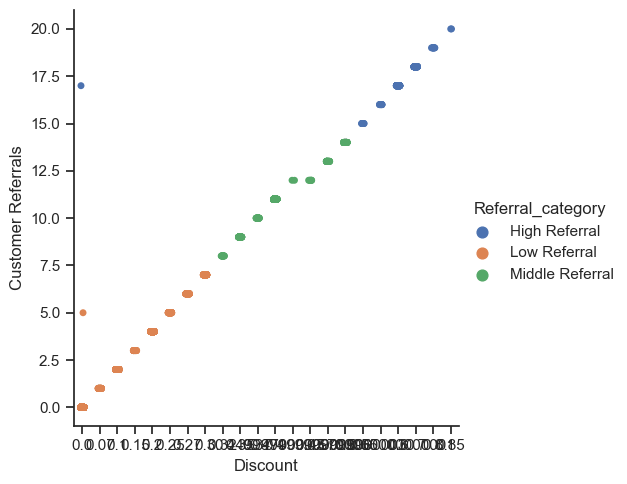

In [41]:
# Create a categorical plot in seaborn using the customer referral categories created above

sns.set(style="ticks")
g = sns.catplot(x="Discount", y="Customer Referrals", hue="Referral_category", data=df)
g.set_xticks(range(10))
##middle referral are the highest which we can encourage more by offering coupons for more referral 


In [42]:
# fig = g.get_figure()
g.savefig("referral vs discount.png") 


In [43]:
## questions answered in this task 
#-	What can cause customers to complaint (shipping cost)? no relation
# does the sales increase with the discounts? 
#it shows the low negative relationship, which means the discount doesn't have high impact on sales
# does the rating effects the complpaints?
#it shows the higher negative relation which means the higher the rating the lower the complaint
# does the discount effect the customer referral?
# it shows high positive realtion but the middle referral is the highest number for mid discounts
